<a href="https://colab.research.google.com/github/talitharhmd/Essay-Answer-Scoring/blob/master/Kelompok_10_code_(rev).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sistem Scoring Esai Otomatis: Komparasi Word2Vec vs FastText pada Refleksi Mahasiswa**

Kelompok 10:
1. Talitha Rahmadewati W (1206220022)
2. Salsabila Felda A (1206220033)
3. Salomon Abraham (1206220038)

---
Link Presentasi: https://teams.microsoft.com/l/meetingrecap?driveId=b%21Mce-dzutBUi6T-GS_mX-5V4EJG36ICBJnaa4es0it8zaVtn05VeWRrmdDYn-rDX0&driveItemId=01JGSSMZ3XUNNNUIVBTZAK75SG433JVUQS&sitePath=https%3A%2F%2Ftelkomuniversityofficial-my.sharepoint.com%2F%3Av%3A%2Fg%2Fpersonal%2Fsalsabilafelda_student_telkomuniversity_ac_id%2FEXejWtoioZ5Ar_ZG5vaa0hIB0nNi1OgXDGqL9nI7uXRdZA&fileUrl=https%3A%2F%2Ftelkomuniversityofficial-my.sharepoint.com%2Fpersonal%2Fsalsabilafelda_student_telkomuniversity_ac_id%2FDocuments%2FRekaman%2FPresentasi%2520Tugas%2520Besar%2520Text%2520Mining-%2520kelompok%252010-20250610_155652-Meeting%2520Recording.mp4%3Fweb%3D1&threadId=19%3Ameeting_MmI4Zjc5NzktYWVkNy00ZmViLWEzZmMtMzQ5NDQxZDY0NWY0%40thread.v2&organizerId=f8f10333-e39c-4a9c-b72e-03921e318ce3&tenantId=90affe0f-c2a3-4108-bb98-6ceb4e94ef15&callId=aa0d122f-c87f-49cd-808d-772b08dc95b6&threadType=Meeting&meetingType=MeetNow&subType=RecapSharingLink_RecapCore

<br>

# 00 Import & Install Library

In [ ]:
!pip install numpy==1.24.4 scipy==1.10.1 gensim==4.3.1 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 757.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstalled smart-open-7.1.0
  Attempting uninstall: scipy
    Found existing installati

In [ ]:
!pip install nltk
!pip install Sastrawi
!pip install stanza
import nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import re
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist

# Stopword Removal & Stemming (Bahasa Indonesia)
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import stanza
from wordcloud import WordCloud

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Word Embedding
import gensim
from gensim.models import Word2Vec, FastText
from gensim.utils import simple_preprocess

# Modeling
from numpy import dot
from numpy.linalg import norm

# 01 Load Dataset

In [ ]:
esai_df = pd.read_excel('https://raw.githubusercontent.com/talitharhmd/Essay-Answer-Scoring/master/Scoring%20Jawaban%20Esai%20Otomatis/Refleksi%20Singkat_%20Pengaruh%20AI%20dalam%20Mengerjakan%20Tugas%20Kuliah%20%20(Responses).xlsx')
kunci_df = pd.read_excel('https://raw.githubusercontent.com/talitharhmd/Essay-Answer-Scoring/master/Scoring%20Jawaban%20Esai%20Otomatis/Key.xlsx')


## a. Esai  Dataset

In [ ]:
esai_df

,Timestamp,1. Lebih adil mana: tugas yang dikerjakan sepenuhnya manual atau tugas yang memperbolehkan bantuan AI? Jelaskan pendapatmu.,"2. Bayangin kamu lagi ngerjain tugas dan ngobrol sama AI kayak ChatGPT. Kira-kira, satu kalimat apa yang paling sering kamu ucapkan ke AI?","3. Dalam satu kalimat, kapan waktu paling bermanfaat menggunakan AI selama jadi mahasiswa?",4. Apa satu risiko utama jika mahasiswa terlalu bergantung pada AI untuk menyelesaikan tugas? Jelaskan singkat!,"5. AI bisa bikin kamu lulus cepat, tapi kamu nggak ngerti apa-apa. Pilih tetap pakai AI atau nggak? Kenapa? (Jawab maksimal 1-2 kalimat)"
0,2025-05-25 14:21:32.583,Tugas yang memperbolehkan bantuan AI lebih adi...,"""Tolong buatkan.....""",Ketika disuruh mencari tema utama/judul suatu ...,Menjadi malas berusaha mempelajari sesuatu mat...,Tetap menggunakan AI tapi membatasi nya
1,2025-05-25 14:49:58.807,"Menurut aku jika membahas tentang kata adil, m...","Biasanya aku pakai kalimat ""tolong carikan art...",Saat sesi tanya jawab pada saat selesai presen...,Mahasiswa cenderung tidak bisa berpikir kritis...,"Tetep pakai, karena menurutku tergantung bagai..."
2,2025-05-25 14:52:53.224,"Tugas memperbolehkan bantuan AI, karena biar k...",Gabungkan poin2 ini menjadi satu kesimpulan. B...,"Kalau menurutku, sangat membantu kalau lahi bi...","Bikin males mikir ya, tapi ga semuanya cuma ad...","Aku sih tetep ya pakai AI, tadi aku idah sempe..."
3,2025-05-25 14:53:03.103,Sepenuhnya manual,Tolong bantu jelaskan pertanyaan tersebut dan ...,Nugas,Kemampuan berpikir kritis mulai berkurang,"Nggak, karena apabila bergantung pada AI maka ..."
4,2025-05-25 15:10:52.874,"Memperbolehkan bantuan AI, mengapa? Karena men...",Tolong jelaskan secara detail mengenai perihal A,Buntu Bahasa Ketika Mengerjakan Tugas Akademik,Mahasiswa akan memiliki pemikiran yang sempit ...,"Tidak, Kenapa? Karena kalau saya menggunakan A..."
5,2025-05-25 16:29:48.910,"Sama"" adil, karena dengan adanya teknologi AI ...",Berikan saya penjelasan tentang.....,Mencari jurnal yang lebih sesuai dengan yang d...,Kurang memahami materi,"Tetap menggunakan AI, karena saya pribadi wala..."
6,2025-05-25 16:55:07.780,tugas yang dikerjakan sepenuhnya manual memili...,jelasin dengan bahasa yang ga ribet,saat otak lagi gaada ide,kurang faham materi,"itu bukan pilihan yang tepat, kan ai juga bisa..."
7,2025-05-25 17:08:37.254,"Boleh menggunakan AI, perkembangan teknologi y...",Carikan referensi materi yang berkaitan,Mencari referensi materi untuk tugas,Membuat mahasiswa kehilangan sifat kritis dan ...,"Tetap pakai dengan bijak, biar lulus cepat dan..."
8,2025-05-25 17:10:16.757,"Menurut saya, lebih baik tugas yang dikerjakan...",Bisa bantu menjelaskan apa maksud dari tugas t...,Ketika kita dapat materi sulit dan membutuhkan...,Risiko utama yang pastinya mahasiswa tersebut ...,"Ngga, karena AI hanya boleh sebagai alat bantu..."
9,2025-05-25 20:25:24.386,"hmmm, sebenrnya 50-50 si. karena kadang aku ka...",tolong buatkan,kalau sudah stuck sama tugas itu dalam 2 hari,kurangnya kemampuan untuk berfikir kritis,"nggak dong, karena kuliah kan buat belajar heh..."


## b. Kunci Dataset

In [ ]:
kunci_df

,Pertanyaan,Jawaban
0,1. Lebih adil mana: tugas yang dikerjakan sepe...,Tugas yang dikerjakan secara manual dianggap l...
1,2. Bayangin kamu lagi ngerjain tugas dan ngobr...,Saat mengerjakan tugas dan berdiskusi dengan A...
2,"3. Dalam satu kalimat, kapan waktu paling berm...",Waktu yang paling bermanfaat menggunakan AI se...
3,4. Apa satu risiko utama jika mahasiswa terlal...,Risiko utama jika mahasiswa terlalu bergantung...
4,"5. AI bisa bikin kamu lulus cepat, tapi kamu n...",Saya memilih untuk tidak hanya mengandalkan AI...


In [ ]:
kunci_df['Pertanyaan'].unique()

array(['1. Lebih adil mana: tugas yang dikerjakan sepenuhnya manual atau tugas yang memperbolehkan bantuan AI? Jelaskan pendapatmu.',
       '2. Bayangin kamu lagi ngerjain tugas dan ngobrol sama AI kayak ChatGPT. Kira-kira, satu kalimat apa yang paling sering kamu ucapkan ke AI?',
       '3. Dalam satu kalimat, kapan waktu paling bermanfaat menggunakan AI selama jadi mahasiswa?',
       '4. Apa satu risiko utama jika mahasiswa terlalu bergantung pada AI untuk menyelesaikan tugas? Jelaskan singkat!',
       '5. AI bisa bikin kamu lulus cepat, tapi kamu nggak ngerti apa-apa. Pilih tetap pakai AI atau nggak? Kenapa? (Jawab maksimal 1–2 kalimat)'],
      dtype=object)

In [ ]:
# dfmerge_esai['Pertanyaan'].unique()

# 02 Preprocessing Data

In [ ]:
esai_df.rename(columns={esai_df.columns[0]: 'Timestamp'}, inplace=True)

esai_df.insert(0, 'ID_Mahasiswa', ['M' + str(i + 1) for i in range(len(esai_df))])

dfmerge_esai = esai_df.melt(
    id_vars=['ID_Mahasiswa', 'Timestamp'],
    var_name='Pertanyaan',
    value_name='Jawaban'
)
dfmerge_esai

,ID_Mahasiswa,Timestamp,Pertanyaan,Jawaban
0,M1,2025-05-25 14:21:32.583,1. Lebih adil mana: tugas yang dikerjakan sepe...,Tugas yang memperbolehkan bantuan AI lebih adi...
1,M2,2025-05-25 14:49:58.807,1. Lebih adil mana: tugas yang dikerjakan sepe...,"Menurut aku jika membahas tentang kata adil, m..."
2,M3,2025-05-25 14:52:53.224,1. Lebih adil mana: tugas yang dikerjakan sepe...,"Tugas memperbolehkan bantuan AI, karena biar k..."
3,M4,2025-05-25 14:53:03.103,1. Lebih adil mana: tugas yang dikerjakan sepe...,Sepenuhnya manual
4,M5,2025-05-25 15:10:52.874,1. Lebih adil mana: tugas yang dikerjakan sepe...,"Memperbolehkan bantuan AI, mengapa? Karena men..."
...,...,...,...,...
200,M37,2025-05-27 10:35:03.286,"5. AI bisa bikin kamu lulus cepat, tapi kamu n...","menurut ku, tetap pakai AI tapi sebagai alat b..."
201,M38,2025-05-27 12:43:30.754,"5. AI bisa bikin kamu lulus cepat, tapi kamu n...","Pakai, tetapi memakai AI tidak harus menelan m..."
202,M39,2025-05-27 15:07:10.809,"5. AI bisa bikin kamu lulus cepat, tapi kamu n...","Ngga, percuma lulus tapi tidak tau apa apa"
203,M40,2025-05-27 15:11:49.163,"5. AI bisa bikin kamu lulus cepat, tapi kamu n...","Tidakk, karena jika aku pakai AI otomatis aku ..."


In [ ]:
dfmerge_esai.tail(50)

,ID_Mahasiswa,Timestamp,Pertanyaan,Jawaban
155,M33,2025-05-26 19:47:24.991,4. Apa satu risiko utama jika mahasiswa terlal...,tidak ingin berusaha lagi karena smuanya diper...
156,M34,2025-05-26 21:31:52.865,4. Apa satu risiko utama jika mahasiswa terlal...,jadi gabisa mikir
157,M35,2025-05-26 21:41:15.789,4. Apa satu risiko utama jika mahasiswa terlal...,"semakin bodoh karena tinggal copas, malas memb..."
158,M36,2025-05-26 23:55:27.902,4. Apa satu risiko utama jika mahasiswa terlal...,mahasiswa menjadi malas dan tidak bisa berpiki...
159,M37,2025-05-27 10:35:03.286,4. Apa satu risiko utama jika mahasiswa terlal...,tidak bisa memahami proses dengan jelas
160,M38,2025-05-27 12:43:30.754,4. Apa satu risiko utama jika mahasiswa terlal...,Mahasiswa yang terlalu bergantung pada AI kemu...
161,M39,2025-05-27 15:07:10.809,4. Apa satu risiko utama jika mahasiswa terlal...,"Pemikiran jadi sempit, terlalu bergantung"
162,M40,2025-05-27 15:11:49.163,4. Apa satu risiko utama jika mahasiswa terlal...,Risikonya kita tidak menghitung langsung jika ...
163,M41,2025-05-27 18:35:01.926,4. Apa satu risiko utama jika mahasiswa terlal...,malas berpikir dan ketergantungan akan Ai
164,M1,2025-05-25 14:21:32.583,"5. AI bisa bikin kamu lulus cepat, tapi kamu n...",Tetap menggunakan AI tapi membatasi nya


In [ ]:
## Data set information for
print("**"*30)
print(" "*15, "Information Esai dataset")
print("**"*30)
print(dfmerge_esai.info())

************************************************************
                Information Esai dataset
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID_Mahasiswa  205 non-null    object        
 1   Timestamp     205 non-null    datetime64[ns]
 2   Pertanyaan    205 non-null    object        
 3   Jawaban       205 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 6.5+ KB
None


In [ ]:
total = dfmerge_esai.isnull().sum().sort_values(ascending=False)
percent = (dfmerge_esai.isnull().sum() / dfmerge_esai.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent*100], axis=1, keys=["Total", "Percent(%)"])
missing_df

,Total,Percent(%)
ID_Mahasiswa,0,0.0
Timestamp,0,0.0
Pertanyaan,0,0.0
Jawaban,0,0.0


In [ ]:
# dfmerge_esai

In [ ]:
duplicates = dfmerge_esai[dfmerge_esai.duplicated()]
print("Total Duplicates rows observed:", duplicates.shape[0])
print("Dropping duplicates")

# Dropping duplicates
print("Shape before dropping duplicates: ", dfmerge_esai.shape[0])
dfmerge_esai.drop_duplicates(inplace=True)
print("Shape after dropping duplicates: ", dfmerge_esai)

Total Duplicates rows observed: 0
Dropping duplicates
Shape before dropping duplicates:  205
Shape after dropping duplicates:      ID_Mahasiswa               Timestamp  \
0             M1 2025-05-25 14:21:32.583   
1             M2 2025-05-25 14:49:58.807   
2             M3 2025-05-25 14:52:53.224   
3             M4 2025-05-25 14:53:03.103   
4             M5 2025-05-25 15:10:52.874   
..           ...                     ...   
200          M37 2025-05-27 10:35:03.286   
201          M38 2025-05-27 12:43:30.754   
202          M39 2025-05-27 15:07:10.809   
203          M40 2025-05-27 15:11:49.163   
204          M41 2025-05-27 18:35:01.926   

                                            Pertanyaan  \
0    1. Lebih adil mana: tugas yang dikerjakan sepe...   
1    1. Lebih adil mana: tugas yang dikerjakan sepe...   
2    1. Lebih adil mana: tugas yang dikerjakan sepe...   
3    1. Lebih adil mana: tugas yang dikerjakan sepe...   
4    1. Lebih adil mana: tugas yang dikerjakan sepe...

# 03 Text Preprocessing

In [ ]:
df = dfmerge_esai.copy()
df_kunci = kunci_df.copy()

## a. Case Folding & Cleansing

In [ ]:
df['Pertanyaan'] = df['Pertanyaan'].str.lower()
df['Jawaban'] = df['Jawaban'].str.lower()
df_kunci['Jawaban'] = df_kunci['Jawaban'].str.lower()
df_kunci['Pertanyaan'] = df_kunci['Pertanyaan'].str.lower()
df.head()

,ID_Mahasiswa,Timestamp,Pertanyaan,Jawaban
0,M1,2025-05-25 14:21:32.583,1. lebih adil mana: tugas yang dikerjakan sepe...,tugas yang memperbolehkan bantuan ai lebih adi...
1,M2,2025-05-25 14:49:58.807,1. lebih adil mana: tugas yang dikerjakan sepe...,"menurut aku jika membahas tentang kata adil, m..."
2,M3,2025-05-25 14:52:53.224,1. lebih adil mana: tugas yang dikerjakan sepe...,"tugas memperbolehkan bantuan ai, karena biar k..."
3,M4,2025-05-25 14:53:03.103,1. lebih adil mana: tugas yang dikerjakan sepe...,sepenuhnya manual
4,M5,2025-05-25 15:10:52.874,1. lebih adil mana: tugas yang dikerjakan sepe...,"memperbolehkan bantuan ai, mengapa? karena men..."


In [ ]:
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+", "", text)  # Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', str(text)).strip()
    text = re.sub(r"@\w+", "", text)  # Hapus mentions (@username)
    text = re.sub(r"[^\w\s]", "", text)  # Hapus tanda baca
    text = re.sub(r"\d+", "", text)  # Hapus angka
    text = re.sub(r"[^\x00-\x7F]+", "", text)  # Hapus emoji & karakter non-ASCII
    text = re.sub(r"\s+", " ", text).strip()  # Hapus spasi berlebih
    text = re.sub(r"[,.!?]", "", text)  # Hapus koma, titik, tanda seru, dan tanda tanya
    return text


df['clean_text'] = df['Jawaban'].apply(clean_text)
df_kunci['clean_text'] = df_kunci['Jawaban'].apply(clean_text)

df.dropna(subset=['clean_text'], inplace=True)
df_kunci.dropna(subset=['clean_text'], inplace=True)

df.head()

,ID_Mahasiswa,Timestamp,Pertanyaan,Jawaban,clean_text
0,M1,2025-05-25 14:21:32.583,1. lebih adil mana: tugas yang dikerjakan sepe...,tugas yang memperbolehkan bantuan ai lebih adi...,tugas yang memperbolehkan bantuan ai lebih adi...
1,M2,2025-05-25 14:49:58.807,1. lebih adil mana: tugas yang dikerjakan sepe...,"menurut aku jika membahas tentang kata adil, m...",menurut aku jika membahas tentang kata adil me...
2,M3,2025-05-25 14:52:53.224,1. lebih adil mana: tugas yang dikerjakan sepe...,"tugas memperbolehkan bantuan ai, karena biar k...",tugas memperbolehkan bantuan ai karena biar ki...
3,M4,2025-05-25 14:53:03.103,1. lebih adil mana: tugas yang dikerjakan sepe...,sepenuhnya manual,sepenuhnya manual
4,M5,2025-05-25 15:10:52.874,1. lebih adil mana: tugas yang dikerjakan sepe...,"memperbolehkan bantuan ai, mengapa? karena men...",memperbolehkan bantuan ai mengapa karena menur...


In [ ]:
def normalize_dash(text):
    return text.replace('–', '-').replace('—', '-').replace('−', '-')

df['Pertanyaan'] = df['Pertanyaan'].apply(normalize_dash)
df_kunci['Pertanyaan'] = df_kunci['Pertanyaan'].apply(normalize_dash)

## b. Normalisasi Slang

In [ ]:
df_slang = pd.read_csv("https://raw.githubusercontent.com/talitharhmd/Essay-Answer-Scoring/master/slang_dict.csv")
slang_dict = dict(zip(df_slang['Slang'], df_slang['Formal']))

additional_slang = {"skrg": "sekarang",
                    "poinpoin": "poin poin",
                    "benerbener": "benar benar",
                    "ngga": "tidak",
                    "tau":"t"

}
slang_dict.update(additional_slang)

def replace_slang(text):
    if not isinstance(text, str):
        return ""
    words = text.split()
    replaced_words = [slang_dict.get(word, word) for word in words]
    return " ".join(replaced_words)

raw_sample = df['Jawaban'].iloc[8]
case_folding = clean_text(raw_sample)
corrected_text = replace_slang(case_folding)

print('Raw data\t\t:', raw_sample)
print('Case folding\t:', case_folding)
print('Corrected Text\t:', corrected_text)
df["after_slang"] = df["clean_text"].apply(replace_slang)

df["after_slang"] = df["after_slang"].str.lower()
df = df[df["after_slang"].str.strip() != ""]
df.head()


Raw data		: menurut saya, lebih baik tugas yang dikerjakan sepenuhnya manual agar tidak selalu mengandalkan ai. selain itu, mengerjakan manual juga dapat melatih kita untuk berpikir kritis, dan memahami materi dasar. bagi saya ai sangat boleh dimanfaatkan cuma dengan catatan tidak boleh copy paste full tanpa memahami isinya. 
Case folding	: menurut saya lebih baik tugas yang dikerjakan sepenuhnya manual agar tidak selalu mengandalkan ai selain itu mengerjakan manual juga dapat melatih kita untuk berpikir kritis dan memahami materi dasar bagi saya ai sangat boleh dimanfaatkan cuma dengan catatan tidak boleh copy paste full tanpa memahami isinya
Corrected Text	: menurut saya lebih baik tugas yang dikerjakan sepenuhnya manual agar tidak selalu mengandalkan ai selain itu mengerjakan manual juga dapat melatih kita untuk berpikir kritis dan memahami materi dasar bagi saya ai sangat boleh dimanfaatkan cuma dengan catatan tidak boleh salin tempel sepenuhnya tanpa memahami isinya


,ID_Mahasiswa,Timestamp,Pertanyaan,Jawaban,clean_text,after_slang
0,M1,2025-05-25 14:21:32.583,1. lebih adil mana: tugas yang dikerjakan sepe...,tugas yang memperbolehkan bantuan ai lebih adi...,tugas yang memperbolehkan bantuan ai lebih adi...,tugas yang memperbolehkan bantuan ai lebih adi...
1,M2,2025-05-25 14:49:58.807,1. lebih adil mana: tugas yang dikerjakan sepe...,"menurut aku jika membahas tentang kata adil, m...",menurut aku jika membahas tentang kata adil me...,menurut aku jika membahas tentang kata adil me...
2,M3,2025-05-25 14:52:53.224,1. lebih adil mana: tugas yang dikerjakan sepe...,"tugas memperbolehkan bantuan ai, karena biar k...",tugas memperbolehkan bantuan ai karena biar ki...,tugas memperbolehkan bantuan ai karena biar ki...
3,M4,2025-05-25 14:53:03.103,1. lebih adil mana: tugas yang dikerjakan sepe...,sepenuhnya manual,sepenuhnya manual,sepenuhnya manual
4,M5,2025-05-25 15:10:52.874,1. lebih adil mana: tugas yang dikerjakan sepe...,"memperbolehkan bantuan ai, mengapa? karena men...",memperbolehkan bantuan ai mengapa karena menur...,memperbolehkan bantuan ai mengapa karena menur...


## c. Tokenizing

In [ ]:
def tokenizing_text(text):
    return word_tokenize(text)

df["Tokenizing"] = df["after_slang"].apply(tokenizing_text)
df_kunci["Tokenizing"] = df_kunci["clean_text"].apply(word_tokenize)
#df.head()
df_kunci.head()

,Pertanyaan,Jawaban,clean_text,Tokenizing
0,1. lebih adil mana: tugas yang dikerjakan sepe...,tugas yang dikerjakan secara manual dianggap l...,tugas yang dikerjakan secara manual dianggap l...,"[tugas, yang, dikerjakan, secara, manual, dian..."
1,2. bayangin kamu lagi ngerjain tugas dan ngobr...,saat mengerjakan tugas dan berdiskusi dengan a...,saat mengerjakan tugas dan berdiskusi dengan a...,"[saat, mengerjakan, tugas, dan, berdiskusi, de..."
2,"3. dalam satu kalimat, kapan waktu paling berm...",waktu yang paling bermanfaat menggunakan ai se...,waktu yang paling bermanfaat menggunakan ai se...,"[waktu, yang, paling, bermanfaat, menggunakan,..."
3,4. apa satu risiko utama jika mahasiswa terlal...,risiko utama jika mahasiswa terlalu bergantung...,risiko utama jika mahasiswa terlalu bergantung...,"[risiko, utama, jika, mahasiswa, terlalu, berg..."
4,"5. ai bisa bikin kamu lulus cepat, tapi kamu n...",saya memilih untuk tidak hanya mengandalkan ai...,saya memilih untuk tidak hanya mengandalkan ai...,"[saya, memilih, untuk, tidak, hanya, mengandal..."


## d. Stopword Removal

In [ ]:
stopword_manual_url = "https://raw.githubusercontent.com/talitharhmd/Essay-Answer-Scoring/master/Scoring%20Jawaban%20Esai%20Otomatis/Stopword.csv"
stopword_manual = pd.read_csv(stopword_manual_url, sep=';')

# Ambil kolom pertama sebagai stopword dan ubah ke huruf kecil
custom_stopwords = set(stopword_manual.iloc[:, 0].str.lower())

additional_stopwords = [
    "jadi", "aja", "ada", "dapat",  "buat", "pas", "yang", "mengapa", "karena", "aku",
    "tidak", "tidakk", "apa", "jika", "ku", "dan", "ya", "sih", "kok", "di", "kita", "idah", "lagi", "hanya", "untuk", "tapi"
]
custom_stopwords.update(additional_stopwords)

# Tambahkan stopword dari NLTK dan Sastrawi (opsional)
factory_stopword = StopWordRemoverFactory()
sastrawi_remover = factory_stopword.create_stop_word_remover()
stopwords_nltk = set(stopwords.words('indonesian'))

def remove_manual_stopwords(tokens):
    return [word for word in tokens if word.lower() not in custom_stopwords]

df["stopword_removed"] = df["Tokenizing"].apply(remove_manual_stopwords)
df_kunci["stopword_removed"] = df_kunci["Tokenizing"].apply(remove_manual_stopwords)

df[["Tokenizing", "stopword_removed"]].tail(50)

,Tokenizing,stopword_removed
155,"[tidak, ingin, berusaha, lagi, karena, semuany...","[ingin, berusaha, semuanya, dipermudah]"
156,"[jadi, tidak, bisa, mikir]","[bisa, mikir]"
157,"[semakin, bodoh, karena, tinggal, salin, ulang...","[semakin, bodoh, tinggal, salin, ulang, malas,..."
158,"[mahasiswa, menjadi, malas, dan, tidak, bisa, ...","[mahasiswa, menjadi, malas, bisa, berpikir, kr..."
159,"[tidak, bisa, memahami, proses, dengan, jelas]","[bisa, memahami, proses, dengan, jelas]"
160,"[mahasiswa, yang, terlalu, bergantung, pada, a...","[mahasiswa, terlalu, bergantung, pada, ai, kem..."
161,"[pemikiran, jadi, sempit, terlalu, bergantung]","[pemikiran, sempit, terlalu, bergantung]"
162,"[risikonya, kita, tidak, menghitung, langsung,...","[risikonya, menghitung, langsung, juga, tahu, ..."
163,"[malas, berpikir, dan, ketergantungan, akan, ai]","[malas, berpikir, ketergantungan, akan, ai]"
164,"[tetap, menggunakan, ai, tapi, membatasi, nya]","[tetap, menggunakan, ai, membatasi, nya]"


## e. Pos Tagging

In [ ]:
nlp = stanza.Pipeline(lang='id', processors='tokenize,pos', use_gpu=False)  # set use_gpu=True jika pakai GPU

def stanza_pos_tag(tokens):
    if not tokens:  # Cek jika input kosong
        return []
    text = " ".join(tokens)
    doc = nlp(text)
    return [(word.text, word.upos) for sent in doc.sentences for word in sent.words]

df["pos_tagged"] = df["stopword_removed"].apply(stanza_pos_tag)
df_kunci["pos_tagged"] = df_kunci["stopword_removed"].apply(stanza_pos_tag)

print(df[["pos_tagged"]].head())


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package    |
--------------------------
| tokenize  | gsd        |
| mwt       | gsd        |
| pos       | gsd_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


                                          pos_tagged
0  [(tugas, NOUN), (memperbolehkan, VERB), (bantu...
1  [(menurut, ADP), (membahas, VERB), (tentang, A...
2  [(tugas, NOUN), (memperbolehkan, VERB), (bantu...
3                 [(sepenuhnya, ADV), (manual, ADJ)]
4  [(memperbolehkan, VERB), (bantuan, NOUN), (ai,...


In [ ]:
for row in df["pos_tagged"]:
    print(row)

[('tugas', 'NOUN'), ('memperbolehkan', 'VERB'), ('bantuan', 'NOUN'), ('ai', 'NOUN'), ('lebih', 'ADV'), ('adil', 'ADJ'), ('selama', 'ADP'), ('penggunaan', 'NOUN'), ('nya', 'PRON'), ('dilakukan', 'VERB'), ('secara', 'ADP'), ('bijak', 'ADJ'), ('merata', 'ADJ'), ('selama', 'ADP'), ('setiap', 'DET'), ('individu', 'NOUN'), ('memiliki', 'VERB'), ('akses', 'NOUN'), ('sama', 'ADJ'), ('terhadap', 'ADP'), ('teknologi', 'NOUN'), ('tersebut', 'DET'), ('tetap', 'ADV'), ('memahami', 'VERB'), ('batas', 'NOUN'), ('antara', 'ADP'), ('bantuan', 'NOUN'), ('ketergantungan', 'NOUN'), ('penggunaan', 'NOUN'), ('ai', 'NOUN'), ('justru', 'ADV'), ('bisa', 'AUX'), ('meningkatkan', 'VERB'), ('kualitas', 'NOUN'), ('pembelajaran', 'NOUN'), ('tanpa', 'ADP'), ('menghilangkan', 'VERB'), ('esensi', 'NOUN'), ('berpikir', 'VERB'), ('kritis', 'ADJ'), ('kreatif', 'ADJ'), ('dari', 'ADP'), ('siswa', 'NOUN'), ('itu', 'DET'), ('sendiri', 'DET')]
[('menurut', 'ADP'), ('membahas', 'VERB'), ('tentang', 'ADP'), ('kata', 'NOUN'), ('

## f. Stemming

In [ ]:
factory_stem = StemmerFactory()
stemmer = factory_stem.create_stemmer()

def filter_pos_and_stem(pos_tagged_tokens, allowed_pos=['NOUN', 'VERB', 'ADJ']):
    filtered_stemmed = []
    for token, pos in pos_tagged_tokens:
        if pos in allowed_pos:
            stemmed_token = stemmer.stem(token)
            filtered_stemmed.append(stemmed_token)
    return filtered_stemmed

df["pos_stemmed_tokens"] = df["pos_tagged"].apply(filter_pos_and_stem)
df_kunci["pos_stemmed_tokens"] = df_kunci["pos_tagged"].apply(filter_pos_and_stem)
df[["pos_tagged", "pos_stemmed_tokens"]].head()


,pos_tagged,pos_stemmed_tokens
0,"[(tugas, NOUN), (memperbolehkan, VERB), (bantu...","[tugas, boleh, bantu, ai, adil, guna, laku, bi..."
1,"[(menurut, ADP), (membahas, VERB), (tentang, A...","[bahas, kata, adil, boleh, bantu, ai, masuk, a..."
2,"[(tugas, NOUN), (memperbolehkan, VERB), (bantu...","[tugas, boleh, bantu, ai, bosan, dapat, ide, g..."
3,"[(sepenuhnya, ADV), (manual, ADJ)]",[manual]
4,"[(memperbolehkan, VERB), (bantuan, NOUN), (ai,...","[boleh, bantu, ai, tolak, maju, teknologi, ban..."


## Frekuensi Distribusi & Word Cloud

In [ ]:
df["tokens"] = df["pos_stemmed_tokens"]

# Lalu gabungkan semua token
flat_tokens = [word for sublist in df["tokens"] for word in sublist]

fdist = FreqDist(flat_tokens)
print(fdist)
print(fdist.most_common(100))

<FreqDist with 437 samples and 1570 outcomes>
[('ai', 126), ('tugas', 59), ('bantu', 51), ('guna', 46), ('kerja', 39), ('pakai', 34), ('paham', 29), ('pikir', 21), ('materi', 21), ('ajar', 18), ('jelas', 18), ('boleh', 17), ('manual', 17), ('manfaat', 16), ('gantung', 15), ('cari', 15), ('buat', 14), ('jadi', 14), ('adil', 13), ('kritis', 13), ('jawab', 13), ('benar', 13), ('mahasiswa', 13), ('ide', 12), ('dapat', 12), ('waktu', 12), ('cepat', 12), ('sumber', 11), ('soal', 11), ('referensi', 10), ('teknologi', 9), ('baik', 9), ('bahasa', 9), ('butuh', 9), ('lulus', 9), ('sama', 8), ('mudah', 8), ('sulit', 8), ('sendiri', 8), ('beri', 8), ('alat', 8), ('bijak', 7), ('batas', 7), ('salin', 7), ('ngerjain', 7), ('mikir', 7), ('erti', 7), ('otak', 7), ('tolong', 7), ('malas', 7), ('ilmu', 7), ('ulang', 6), ('mampu', 6), ('proses', 6), ('sekarang', 6), ('utama', 6), ('ngerti', 6), ('jebak', 6), ('kuliah', 6), ('selesai', 5), ('orang', 5), ('tahu', 5), ('tulis', 5), ('kembang', 5), ('minta',

In [ ]:
df_most_common = pd.DataFrame(fdist.most_common(200), columns=["Word", "Frequency"])

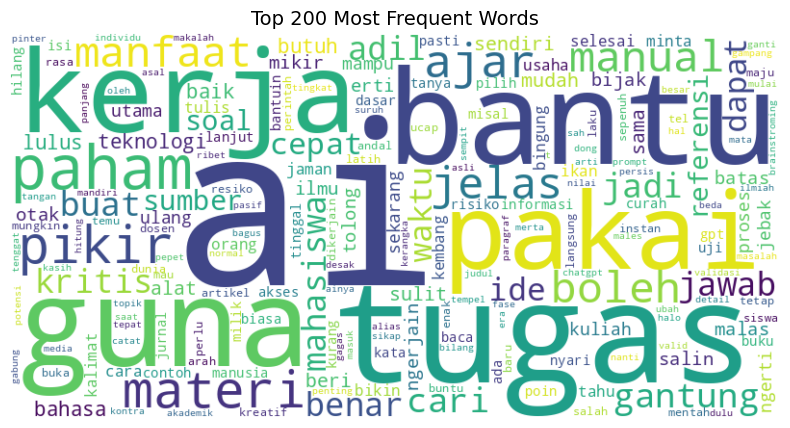

In [ ]:
top_100_words = dict(fdist.most_common(200))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_100_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 200 Most Frequent Words", fontsize=14)
plt.show()

In [ ]:
from nltk.util import ngrams

df["bigram_tokens"] = df["pos_stemmed_tokens"]
all_bigrams = [bigram for tokens in df["bigram_tokens"] for bigram in ngrams(tokens, 2)]
bigram_freq = FreqDist(all_bigrams)
df_bigrams = pd.DataFrame(bigram_freq.most_common(200), columns=["Bigram", "Frequency"])
df_bigrams["Bigram"] = df_bigrams["Bigram"].apply(lambda x: ' '.join(x))
df_bigrams

,Bigram,Frequency
0,guna ai,25
1,pakai ai,21
2,bantu ai,15
3,kerja tugas,14
4,pikir kritis,10
...,...,...
195,guna misal,1
196,misal prompt,1
197,prompt chatgpt,1
198,chatgpt salin,1


In [ ]:
df.head()

,ID_Mahasiswa,Timestamp,Pertanyaan,Jawaban,clean_text,after_slang,Tokenizing,stopword_removed,pos_tagged,pos_stemmed_tokens,tokens,bigram_tokens
0,M1,2025-05-25 14:21:32.583,1. lebih adil mana: tugas yang dikerjakan sepe...,tugas yang memperbolehkan bantuan ai lebih adi...,tugas yang memperbolehkan bantuan ai lebih adi...,tugas yang memperbolehkan bantuan ai lebih adi...,"[tugas, yang, memperbolehkan, bantuan, ai, leb...","[tugas, memperbolehkan, bantuan, ai, lebih, ad...","[(tugas, NOUN), (memperbolehkan, VERB), (bantu...","[tugas, boleh, bantu, ai, adil, guna, laku, bi...","[tugas, boleh, bantu, ai, adil, guna, laku, bi...","[tugas, boleh, bantu, ai, adil, guna, laku, bi..."
1,M2,2025-05-25 14:49:58.807,1. lebih adil mana: tugas yang dikerjakan sepe...,"menurut aku jika membahas tentang kata adil, m...",menurut aku jika membahas tentang kata adil me...,menurut aku jika membahas tentang kata adil me...,"[menurut, aku, jika, membahas, tentang, kata, ...","[menurut, membahas, tentang, kata, adil, mempe...","[(menurut, ADP), (membahas, VERB), (tentang, A...","[bahas, kata, adil, boleh, bantu, ai, masuk, a...","[bahas, kata, adil, boleh, bantu, ai, masuk, a...","[bahas, kata, adil, boleh, bantu, ai, masuk, a..."
2,M3,2025-05-25 14:52:53.224,1. lebih adil mana: tugas yang dikerjakan sepe...,"tugas memperbolehkan bantuan ai, karena biar k...",tugas memperbolehkan bantuan ai karena biar ki...,tugas memperbolehkan bantuan ai karena biar ki...,"[tugas, memperbolehkan, bantuan, ai, karena, b...","[tugas, memperbolehkan, bantuan, ai, biar, bos...","[(tugas, NOUN), (memperbolehkan, VERB), (bantu...","[tugas, boleh, bantu, ai, bosan, dapat, ide, g...","[tugas, boleh, bantu, ai, bosan, dapat, ide, g...","[tugas, boleh, bantu, ai, bosan, dapat, ide, g..."
3,M4,2025-05-25 14:53:03.103,1. lebih adil mana: tugas yang dikerjakan sepe...,sepenuhnya manual,sepenuhnya manual,sepenuhnya manual,"[sepenuhnya, manual]","[sepenuhnya, manual]","[(sepenuhnya, ADV), (manual, ADJ)]",[manual],[manual],[manual]
4,M5,2025-05-25 15:10:52.874,1. lebih adil mana: tugas yang dikerjakan sepe...,"memperbolehkan bantuan ai, mengapa? karena men...",memperbolehkan bantuan ai mengapa karena menur...,memperbolehkan bantuan ai mengapa karena menur...,"[memperbolehkan, bantuan, ai, mengapa, karena,...","[memperbolehkan, bantuan, ai, menurut, saya, s...","[(memperbolehkan, VERB), (bantuan, NOUN), (ai,...","[boleh, bantu, ai, tolak, maju, teknologi, ban...","[boleh, bantu, ai, tolak, maju, teknologi, ban...","[boleh, bantu, ai, tolak, maju, teknologi, ban..."


# 04 Word Embbedding

In [ ]:
df2 = df.copy()
df2_kunci = df_kunci.copy()

In [ ]:
df2["tokens"] = df2["pos_stemmed_tokens"]
df2_kunci["tokens"] = df2_kunci["pos_stemmed_tokens"]

df2.head()
df2_kunci.head()

,Pertanyaan,Jawaban,clean_text,Tokenizing,stopword_removed,pos_tagged,pos_stemmed_tokens,tokens
0,1. lebih adil mana: tugas yang dikerjakan sepe...,tugas yang dikerjakan secara manual dianggap l...,tugas yang dikerjakan secara manual dianggap l...,"[tugas, yang, dikerjakan, secara, manual, dian...","[tugas, dikerjakan, secara, manual, dianggap, ...","[(tugas, NOUN), (dikerjakan, VERB), (secara, A...","[tugas, kerja, manual, anggap, adil, mahasiswa...","[tugas, kerja, manual, anggap, adil, mahasiswa..."
1,2. bayangin kamu lagi ngerjain tugas dan ngobr...,saat mengerjakan tugas dan berdiskusi dengan a...,saat mengerjakan tugas dan berdiskusi dengan a...,"[saat, mengerjakan, tugas, dan, berdiskusi, de...","[saat, mengerjakan, tugas, berdiskusi, dengan,...","[(saat, SCONJ), (mengerjakan, VERB), (tugas, N...","[kerja, tugas, diskus, ai, chatgpt, kalimat, u...","[kerja, tugas, diskus, ai, chatgpt, kalimat, u..."
2,"3. dalam satu kalimat, kapan waktu paling berm...",waktu yang paling bermanfaat menggunakan ai se...,waktu yang paling bermanfaat menggunakan ai se...,"[waktu, yang, paling, bermanfaat, menggunakan,...","[waktu, paling, bermanfaat, menggunakan, ai, s...","[(waktu, NOUN), (paling, ADV), (bermanfaat, VE...","[waktu, manfaat, guna, ai, jadi, mahasiswa, al...","[waktu, manfaat, guna, ai, jadi, mahasiswa, al..."
3,4. apa satu risiko utama jika mahasiswa terlal...,risiko utama jika mahasiswa terlalu bergantung...,risiko utama jika mahasiswa terlalu bergantung...,"[risiko, utama, jika, mahasiswa, terlalu, berg...","[risiko, utama, mahasiswa, terlalu, bergantung...","[(risiko, NOUN), (utama, ADJ), (mahasiswa, NOU...","[risiko, utama, mahasiswa, gantung, ai, selesa...","[risiko, utama, mahasiswa, gantung, ai, selesa..."
4,"5. ai bisa bikin kamu lulus cepat, tapi kamu n...",saya memilih untuk tidak hanya mengandalkan ai...,saya memilih untuk tidak hanya mengandalkan ai...,"[saya, memilih, untuk, tidak, hanya, mengandal...","[saya, memilih, mengandalkan, ai, lulus, tanpa...","[(saya, PRON), (memilih, VERB), (mengandalkan,...","[pilih, andal, ai, lulus, paham, rugi, masa, d...","[pilih, andal, ai, lulus, paham, rugi, masa, d..."


## a. Word2Vec

In [ ]:
all_sentences = pd.concat([df2["tokens"], df2_kunci["tokens"]], ignore_index=True).tolist()

# Word2Vec (CBOW default)
w2v_model = Word2Vec(sentences=all_sentences, vector_size=100, window=7, min_count=1, workers=4)

def sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Hitung vektor kalimat
df2["w2v_vec"] = df2["tokens"].apply(lambda x: sentence_vector(x, w2v_model))
df2_kunci["w2v_vec"] = df2_kunci["tokens"].apply(lambda x: sentence_vector(x, w2v_model))


In [ ]:
tokens = df2.loc[0, "tokens"]

# Matriks vektor Word2Vec untuk token
matrix_w2v = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
matrix_w2v_df = pd.DataFrame(matrix_w2v, index=[word for word in tokens if word in w2v_model.wv])

print("=== Matriks Vektor Word2Vec (baris per kata) ===")
print(matrix_w2v_df.head())

=== Matriks Vektor Word2Vec (baris per kata) ===
             0         1         2         3         4         5         6   \
tugas -0.010640  0.006743  0.006340  0.006455  0.007099 -0.012263  0.003190   
boleh  0.000624 -0.008684  0.004923 -0.000314  0.006271 -0.000272 -0.002614   
bantu -0.001570  0.005653 -0.006005 -0.000546  0.007580  0.002231 -0.001892   
ai    -0.002442  0.003941  0.006351  0.010076 -0.009800 -0.014274  0.008725   
adil   0.008968 -0.008569 -0.006032  0.003243  0.006271 -0.007717  0.003635   

             7         8         9   ...        90        91        92  \
tugas  0.012881 -0.006015 -0.008469  ...  0.007077  0.001717  0.002632   
boleh  0.010077  0.000467 -0.000824  ...  0.008936  0.005872  0.008764   
bantu  0.008260 -0.011192  0.004183  ...  0.000450  0.008455  0.009566   
ai     0.017381 -0.008945 -0.006654  ...  0.008743  0.003958  0.003890   
adil   0.011921 -0.008314 -0.007001  ...  0.010072 -0.002949  0.004649   

             93        94      

## b. FastText

In [ ]:
ft_model = FastText(sentences=all_sentences, vector_size=100, window=7, min_count=1, workers=4)

In [ ]:
def sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

df2["ft_vec"] = df2["tokens"].apply(lambda x: sentence_vector(x, ft_model))
df2_kunci["ft_vec"] = df2_kunci["tokens"].apply(lambda x: sentence_vector(x, ft_model))

matrix_ft = [ft_model.wv[word] for word in tokens if word in ft_model.wv]
matrix_ft_df = pd.DataFrame(matrix_ft, index=[word for word in tokens if word in ft_model.wv])
print("=== Matriks Vektor FastText (baris per kata) ===")
print(matrix_ft_df.head())

=== Matriks Vektor FastText (baris per kata) ===
             0         1         2         3         4         5         6   \
tugas  0.000506 -0.000313  0.000699 -0.000134  0.000047 -0.000631  0.001676   
boleh  0.000662 -0.001577  0.000228 -0.000097 -0.001997  0.000785 -0.002160   
bantu -0.002444  0.000369  0.001752 -0.001718  0.001774  0.002972 -0.000356   
ai    -0.004285 -0.001568  0.006253  0.002269  0.000356  0.003887  0.003421   
adil   0.002069  0.000270 -0.002114  0.000850  0.002944  0.002986 -0.000353   

             7         8         9   ...        90        91        92  \
tugas  0.000069 -0.000299 -0.000211  ... -0.001479 -0.000948 -0.000953   
boleh  0.001064  0.001722 -0.002625  ...  0.000264 -0.000079  0.000387   
bantu -0.003500  0.002891 -0.001511  ... -0.001272  0.001048  0.001213   
ai     0.004472  0.000687  0.000303  ... -0.003028 -0.002906  0.003896   
adil   0.001603 -0.001243 -0.000872  ... -0.000160  0.002838 -0.001123   

             93        94      

# 05 Modeling (Cosine Similarity)

In [ ]:
def cosine_sim_manual(vec1, vec2):
    if vec1 is None or vec2 is None:
        return 0.0
    if not isinstance(vec1, np.ndarray) or not isinstance(vec2, np.ndarray):
        return 0.0
    if norm(vec1) == 0 or norm(vec2) == 0:
        return 0.0
    return float(dot(vec1, vec2) / (norm(vec1) * norm(vec2)))

# Fungsi menghitung skor kemiripan hanya dengan kunci yang sesuai
def match_score_per_question(row, kunci_df, vec_col):
    pertanyaan_ke = row['Pertanyaan']
    jawaban_vec = row[vec_col]

    # Ambil vektor kunci yang sesuai dengan pertanyaan
    kunci_vec = kunci_df.loc[kunci_df['Pertanyaan'] == pertanyaan_ke, vec_col]

    if kunci_vec.empty:
        return 0.0

    return cosine_sim_manual(jawaban_vec, kunci_vec.values[0])

df2['w2v_score'] = df2.apply(lambda row: match_score_per_question(row, df2_kunci, 'w2v_vec'), axis=1)
df2['ft_score'] = df2.apply(lambda row: match_score_per_question(row, df2_kunci, 'ft_vec'), axis=1)


In [ ]:
df2

,ID_Mahasiswa,Timestamp,Pertanyaan,Jawaban,clean_text,after_slang,Tokenizing,stopword_removed,pos_tagged,pos_stemmed_tokens,tokens,bigram_tokens,w2v_vec,ft_vec,w2v_score,ft_score
0,M1,2025-05-25 14:21:32.583,1. lebih adil mana: tugas yang dikerjakan sepe...,tugas yang memperbolehkan bantuan ai lebih adi...,tugas yang memperbolehkan bantuan ai lebih adi...,tugas yang memperbolehkan bantuan ai lebih adi...,"[tugas, yang, memperbolehkan, bantuan, ai, leb...","[tugas, memperbolehkan, bantuan, ai, lebih, ad...","[(tugas, NOUN), (memperbolehkan, VERB), (bantu...","[tugas, boleh, bantu, ai, adil, guna, laku, bi...","[tugas, boleh, bantu, ai, adil, guna, laku, bi...","[tugas, boleh, bantu, ai, adil, guna, laku, bi...","[-0.0026882682, 0.0031152675, 0.00062928523, 0...","[-0.0016204213, -0.00041764457, 0.0008798113, ...",0.866730,0.982238
1,M2,2025-05-25 14:49:58.807,1. lebih adil mana: tugas yang dikerjakan sepe...,"menurut aku jika membahas tentang kata adil, m...",menurut aku jika membahas tentang kata adil me...,menurut aku jika membahas tentang kata adil me...,"[menurut, aku, jika, membahas, tentang, kata, ...","[menurut, membahas, tentang, kata, adil, mempe...","[(menurut, ADP), (membahas, VERB), (tentang, A...","[bahas, kata, adil, boleh, bantu, ai, masuk, a...","[bahas, kata, adil, boleh, bantu, ai, masuk, a...","[bahas, kata, adil, boleh, bantu, ai, masuk, a...","[-0.0019114848, 0.0018211281, 0.00095477636, 0...","[-0.0013816655, -0.00032980848, 0.00071098906,...",0.906922,0.976539
2,M3,2025-05-25 14:52:53.224,1. lebih adil mana: tugas yang dikerjakan sepe...,"tugas memperbolehkan bantuan ai, karena biar k...",tugas memperbolehkan bantuan ai karena biar ki...,tugas memperbolehkan bantuan ai karena biar ki...,"[tugas, memperbolehkan, bantuan, ai, karena, b...","[tugas, memperbolehkan, bantuan, ai, biar, bos...","[(tugas, NOUN), (memperbolehkan, VERB), (bantu...","[tugas, boleh, bantu, ai, bosan, dapat, ide, g...","[tugas, boleh, bantu, ai, bosan, dapat, ide, g...","[tugas, boleh, bantu, ai, bosan, dapat, ide, g...","[-0.0017059498, 0.0029998908, 0.0005690499, 0....","[-0.00134753, -0.000421299, 0.0005911697, 0.00...",0.767954,0.953405
3,M4,2025-05-25 14:53:03.103,1. lebih adil mana: tugas yang dikerjakan sepe...,sepenuhnya manual,sepenuhnya manual,sepenuhnya manual,"[sepenuhnya, manual]","[sepenuhnya, manual]","[(sepenuhnya, ADV), (manual, ADJ)]",[manual],[manual],[manual],"[0.009105332, 0.009230775, 0.001672226, 0.0054...","[-0.00053711736, -0.0003418574, 3.733427e-06, ...",0.504628,0.714312
4,M5,2025-05-25 15:10:52.874,1. lebih adil mana: tugas yang dikerjakan sepe...,"memperbolehkan bantuan ai, mengapa? karena men...",memperbolehkan bantuan ai mengapa karena menur...,memperbolehkan bantuan ai mengapa karena menur...,"[memperbolehkan, bantuan, ai, mengapa, karena,...","[memperbolehkan, bantuan, ai, menurut, saya, s...","[(memperbolehkan, VERB), (bantuan, NOUN), (ai,...","[boleh, bantu, ai, tolak, maju, teknologi, ban...","[boleh, bantu, ai, tolak, maju, teknologi, ban...","[boleh, bantu, ai, tolak, maju, teknologi, ban...","[-0.0025737465, 0.0026431591, 0.0009142101, 0....","[-0.001497514, -0.0005442148, 0.0007640949, -0...",0.874583,0.972240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,M37,2025-05-27 10:35:03.286,"5. ai bisa bikin kamu lulus cepat, tapi kamu n...","menurut ku, tetap pakai ai tapi sebagai alat b...",menurut ku tetap pakai ai tapi sebagai alat ba...,menurut ku tetap pakai ai tapi sebagai alat ba...,"[menurut, ku, tetap, pakai, ai, tapi, sebagai,...","[menurut, tetap, pakai, ai, sebagai, alat, ban...","[(menurut, ADP), (tetap, ADV), (pakai, VERB), ...","[pakai, ai, alat, bantu, contoh, paham, ajar, ...","[pakai, ai, alat, bantu, contoh, paham, ajar, ...","[pakai, ai, alat, bantu, contoh, paham, ajar, ...","[-0.00069199636, 0.0016422838, 0.0017645824, 0...","[-0.0031645754, -0.0005374971, 0.0016322685, 0...",0.840443,0.948300
201,M38,2025-05-27 12:43:30.754,"5. ai bisa bikin kamu lulus

In [ ]:
print("Jumlah baris df2:", df2.shape[0])
print("Jumlah baris df2_kunci:", df2_kunci.shape[0])

Jumlah baris df2: 205
Jumlah baris df2_kunci: 5


In [ ]:
idx = 180
vec_jawaban_w2v = df2.at[idx, "w2v_vec"]
vec_jawaban_ft = df2.at[idx, "ft_vec"]
pertanyaan = df2.at[idx, "Pertanyaan"]

# Ambil baris kunci yang cocok
baris_kunci = df2_kunci[df2_kunci["Pertanyaan"] == pertanyaan]

if not baris_kunci.empty:
    vec_kunci_w2v = baris_kunci.iloc[0]["w2v_vec"]
    vec_kunci_ft = baris_kunci.iloc[0]["ft_vec"]

    sim_w2v = cosine_sim_manual(vec_jawaban_w2v, vec_kunci_w2v)
    sim_ft = cosine_sim_manual(vec_jawaban_ft, vec_kunci_ft)

    print(f"Pertanyaan: {pertanyaan}")
    print(f"Cosine Similarity Word2Vec: {sim_w2v:.4f}")
    print(f"Cosine Similarity FastText: {sim_ft:.4f}")
else:
    print(f"Tidak ditemukan kunci untuk pertanyaan: {pertanyaan}")

Pertanyaan: 5. ai bisa bikin kamu lulus cepat, tapi kamu nggak ngerti apa-apa. pilih tetap pakai ai atau nggak? kenapa? (jawab maksimal 1-2 kalimat)
Cosine Similarity Word2Vec: 0.7369
Cosine Similarity FastText: 0.9357


In [ ]:
# idx = 180
# pertanyaan_dari_df2 = df2.at[idx, "Pertanyaan"]
# print(f"Pertanyaan dari df2 (idx {idx}): '{pertanyaan_dari_df2}'")

# print("\nSemua Pertanyaan unik dari df2_kunci:")
# for q_kunci in df2_kunci["Pertanyaan"].unique():
#     print(f"  '{q_kunci}'")

# if pertanyaan_dari_df2 in df2_kunci["Pertanyaan"].values:
#     print("\nPertanyaan dari df2 DITEMUKAN di df2_kunci.")
# else:
#     print("\nPertanyaan dari df2 TIDAK DITEMUKAN di df2_kunci.")

In [ ]:
# idx = 4
# pertanyaan_dari_df2 = df2_kunci.at[idx, "Pertanyaan"]
# print(f"Pertanyaan dari df2 (idx {idx}): '{pertanyaan_dari_df2}'")

# print("\nSemua Pertanyaan unik dari df2_kunci:")
# for q_kunci in df2["Pertanyaan"].unique():
#     print(f"  '{q_kunci}'")

# if pertanyaan_dari_df2 in df2_kunci["Pertanyaan"].values:
#     print("\nPertanyaan dari df2 DITEMUKAN di df2_kunci.")
# else:
#     print("\nPertanyaan dari df2 TIDAK DITEMUKAN di df2_kunci.")

In [ ]:
merged_df = df2.merge(
    df2_kunci[['Pertanyaan', 'w2v_vec', 'ft_vec']],
    on='Pertanyaan',
    suffixes=('', '_kunci')
)

merged_df['sim_w2v'] = merged_df.apply(lambda x: cosine_sim_manual(x['w2v_vec'], x['w2v_vec_kunci']), axis=1)
merged_df['sim_ft'] = merged_df.apply(lambda x: cosine_sim_manual(x['ft_vec'], x['ft_vec_kunci']), axis=1)

merged_df[['Timestamp', 'Pertanyaan', 'Jawaban', 'sim_w2v', 'sim_ft']].tail()


,Timestamp,Pertanyaan,Jawaban,sim_w2v,sim_ft
200,2025-05-27 10:35:03.286,"5. ai bisa bikin kamu lulus cepat, tapi kamu n...","menurut ku, tetap pakai ai tapi sebagai alat b...",0.840443,0.948300
201,2025-05-27 12:43:30.754,"5. ai bisa bikin kamu lulus cepat, tapi kamu n...","pakai, tetapi memakai ai tidak harus menelan m...",0.592781,0.904829
202,2025-05-27 15:07:10.809,"5. ai bisa bikin kamu lulus cepat, tapi kamu n...","ngga, percuma lulus tapi tidak tau apa apa",0.287953,0.154391
203,2025-05-27 15:11:49.163,"5. ai bisa bikin kamu lulus cepat, tapi kamu n...","tidakk, karena jika aku pakai ai otomatis aku ...",0.553816,0.879195
204,2025-05-27 18:35:01.926,"5. ai bisa bikin kamu lulus cepat, tapi kamu n...",tetap menggunakan ai tetapi tidak memprioritas...,0.674786,0.883379


# 06 Evaluasi Model

In [ ]:
df3 = merged_df.copy()

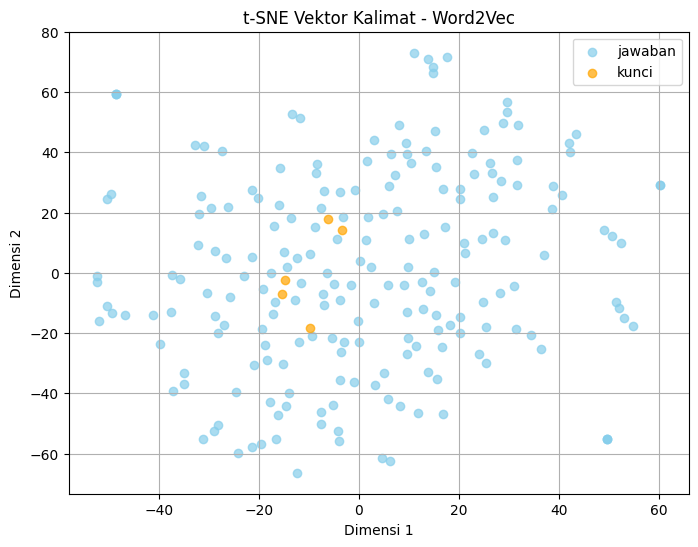

In [ ]:
from sklearn.manifold import TSNE

w2v_vectors = list(df2['w2v_vec']) + list(df2_kunci['w2v_vec'])
w2v_labels = ['jawaban'] * len(df2) + ['kunci'] * len(df2_kunci)

# Jalankan t-SNE
tsne_w2v = TSNE(n_components=2, perplexity=5, random_state=42)
w2v_2d = tsne_w2v.fit_transform(np.array(w2v_vectors))

# Visualisasi
plt.figure(figsize=(8, 6))
for label, color in [('jawaban', 'skyblue'), ('kunci', 'orange')]:
    idx = [i for i, l in enumerate(w2v_labels) if l == label]
    plt.scatter(w2v_2d[idx, 0], w2v_2d[idx, 1], label=label, alpha=0.7, c=color)

plt.title("t-SNE Vektor Kalimat - Word2Vec")
plt.xlabel("Dimensi 1")
plt.ylabel("Dimensi 2")
plt.legend()
plt.grid(True)
plt.show()


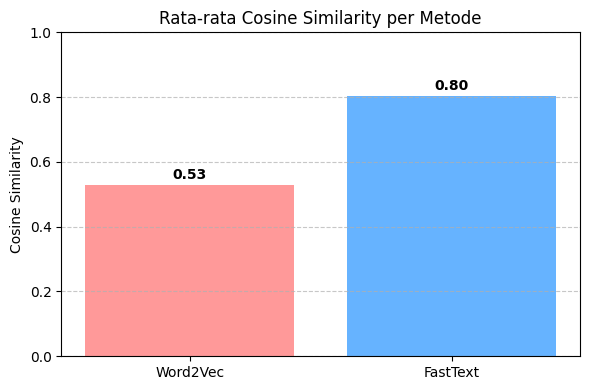

In [ ]:
# Rata-rata
avg_sim_w2v = df3['sim_w2v'].mean()
avg_sim_ft = df3['sim_ft'].mean()

methods = ['Word2Vec', 'FastText']
average_scores = [avg_sim_w2v, avg_sim_ft]
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(6, 4))
plt.bar(methods, average_scores, color=colors)
plt.ylim(0, 1)
plt.title('Rata-rata Cosine Similarity per Metode')
plt.ylabel('Cosine Similarity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(average_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
if "ai" in w2v_model.wv:
    print("\n=== Word2Vec - Kata paling mirip dengan 'ai' ===")
    for word, score in w2v_model.wv.most_similar("ai", topn=5):
        print(f"{word}: {score:.4f}")
else:
    print("\nKata 'ai' tidak ditemukan dalam model Word2Vec")

if "ai" in ft_model.wv:
    print("\n=== FastText - Kata paling mirip dengan 'ai' ===")
    for word, score in ft_model.wv.most_similar("ai", topn=5):
        print(f"{word}: {score:.4f}")
else:
    print("\nKata 'ai' tidak ditemukan dalam model FastText")


=== Word2Vec - Kata paling mirip dengan 'ai' ===
kembang: 0.4086
baca: 0.3829
kerjain: 0.3707
alat: 0.3543
tugas: 0.3470

=== FastText - Kata paling mirip dengan 'ai' ===
gantung: 0.6507
pakai: 0.6291
ulang: 0.6069
panjang: 0.6010
jarang: 0.5720


In [ ]:
df3.head()

,ID_Mahasiswa,Timestamp,Pertanyaan,Jawaban,clean_text,after_slang,Tokenizing,stopword_removed,pos_tagged,pos_stemmed_tokens,tokens,bigram_tokens,w2v_vec,ft_vec,w2v_score,ft_score,w2v_vec_kunci,ft_vec_kunci,sim_w2v,sim_ft
0,M1,2025-05-25 14:21:32.583,1. lebih adil mana: tugas yang dikerjakan sepe...,tugas yang memperbolehkan bantuan ai lebih adi...,tugas yang memperbolehkan bantuan ai lebih adi...,tugas yang memperbolehkan bantuan ai lebih adi...,"[tugas, yang, memperbolehkan, bantuan, ai, leb...","[tugas, memperbolehkan, bantuan, ai, lebih, ad...","[(tugas, NOUN), (memperbolehkan, VERB), (bantu...","[tugas, boleh, bantu, ai, adil, guna, laku, bi...","[tugas, boleh, bantu, ai, adil, guna, laku, bi...","[tugas, boleh, bantu, ai, adil, guna, laku, bi...","[-0.0026882682, 0.0031152675, 0.00062928523, 0...","[-0.0016204213, -0.00041764457, 0.0008798113, ...",0.866730,0.982238,"[-0.0025666426, 0.0026811808, -0.0003507739, 0...","[-0.0019467198, -0.00044109908, 0.0005310474, ...",0.866730,0.982238
1,M2,2025-05-25 14:49:58.807,1. lebih adil mana: tugas yang dikerjakan sepe...,"menurut aku jika membahas tentang kata adil, m...",menurut aku jika membahas tentang kata adil me...,menurut aku jika membahas tentang kata adil me...,"[menurut, aku, jika, membahas, tentang, kata, ...","[menurut, membahas, tentang, kata, adil, mempe...","[(menurut, ADP), (membahas, VERB), (tentang, A...","[bahas, kata, adil, boleh, bantu, ai, masuk, a...","[bahas, kata, adil, boleh, bantu, ai, masuk, a...","[bahas, kata, adil, boleh, bantu, ai, masuk, a...","[-0.0019114848, 0.0018211281, 0.00095477636, 0...","[-0.0013816655, -0.00032980848, 0.00071098906,...",0.906922,0.976539,"[-0.0025666426, 0.0026811808, -0.0003507739, 0...","[-0.0019467198, -0.00044109908, 0.0005310474, ...",0.906922,0.976539
2,M3,2025-05-25 14:52:53.224,1. lebih adil mana: tugas yang dikerjakan sepe...,"tugas memperbolehkan bantuan ai, karena biar k...",tugas memperbolehkan bantuan ai karena biar ki...,tugas memperbolehkan bantuan ai karena biar ki...,"[tugas, memperbolehkan, bantuan, ai, karena, b...","[tugas, memperbolehkan, bantuan, ai, biar, bos...","[(tugas, NOUN), (memperbolehkan, VERB), (bantu...","[tugas, boleh, bantu, ai, bosan, dapat, ide, g...","[tugas, boleh, bantu, ai, bosan, dapat, ide, g...","[tugas, boleh, bantu, ai, bosan, dapat, ide, g...","[-0.0017059498, 0.0029998908, 0.0005690499, 0....","[-0.00134753, -0.000421299, 0.0005911697, 0.00...",0.767954,0.964317,"[-0.0025666426, 0.0026811808, -0.0003507739, 0...","[-0.0019467198, -0.00044109908, 0.0005310474, ...",0.767954,0.953405
3,M4,2025-05-25 14:53:03.103,1. lebih adil mana: tugas yang dikerjakan sepe...,sepenuhnya manual,sepenuhnya manual,sepenuhnya manual,"[sepenuhnya, manual]","[sepenuhnya, manual]","[(sepenuhnya, ADV), (manual, ADJ)]",[manual],[manual],[manual],"[0.009105332, 0.009230775, 0.001672226, 0.0054...","[-0.00053711736, -0.0003418574, 3.733427e-06, ...",0.504628,0.719193,"[-0.0025666426, 0.0026811808, -0.0003507739, 0...","[-0.0019467198, -0.00044109908, 0.0005310474, ...",0.504628,0.714312
4,M5,2025-05-25 15:10:52.874,1. lebih adil mana: tugas yang dikerjakan sepe...,"memperbolehkan bantuan ai, mengapa? karena men...",memperbolehkan bantuan ai mengapa karena menur...,memperbolehkan bantuan ai mengapa karena menur...,"[memperbolehkan, bantuan, ai, mengapa, karena,...","[memperbolehkan, bantuan, ai, menurut, saya, s...","[(memperbolehkan, VERB), (bantuan, NOUN), (ai,...","[boleh, bantu, ai, tolak, maju, teknologi, ban...","[boleh, bantu, ai, tolak, maju, teknologi, ban...","[boleh, bantu, ai, tolak, maju, teknologi, ban...","[-0.0025737465, 0.0026431591, 0.0009142101, 0....","[-0.001497514, -0.0005442148, 0.0007640949, -0...",0.874583,0.972240,"[-0.0025666426, 0.0026811808, -0.0003507739, 0...","[-0.0019467198, -0.00044109908, 0.0005310474, ...",0.874583,0.972240


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID_Mahasiswa        205 non-null    object        
 1   Timestamp           205 non-null    datetime64[ns]
 2   Pertanyaan          205 non-null    object        
 3   Jawaban             205 non-null    object        
 4   clean_text          205 non-null    object        
 5   after_slang         205 non-null    object        
 6   Tokenizing          205 non-null    object        
 7   stopword_removed    205 non-null    object        
 8   pos_tagged          205 non-null    object        
 9   pos_stemmed_tokens  205 non-null    object        
 10  tokens              205 non-null    object        
 11  bigram_tokens       205 non-null    object        
 12  w2v_vec             205 non-null    object        
 13  ft_vec              205 non-null    object        

# 07 EDA

In [ ]:
def categorize_similarity(sim):
    if sim >= 0.91:
        return 100
    elif sim >= 0.81:
        return 90
    elif sim >= 0.71:
        return 80
    elif sim >= 0.61:
        return 70
    elif sim >= 0.51:
        return 60
    elif sim >= 0.41:
        return 50
    elif sim >= 0.31:
        return 40
    elif sim >= 0.21:
        return 30
    elif sim >= 0.11:
        return 20
    elif sim >= 0.01:
        return 10
    else:
        return 0

df3['kategori_w2v'] = df3['sim_w2v'].apply(categorize_similarity)
df3['kategori_ft'] = df3['sim_ft'].apply(categorize_similarity)
df3[['sim_w2v', 'kategori_w2v', 'sim_ft', 'kategori_ft']].head()

,sim_w2v,kategori_w2v,sim_ft,kategori_ft
0,0.866730,90,0.982238,100
1,0.906922,90,0.976539,100
2,0.767954,80,0.953405,100
3,0.504628,50,0.714312,80
4,0.874583,90,0.972240,100


In [ ]:
def categorize_by_quantile(series, n_bins=3, labels=None, suffix=''):
    """
    Membuat kategori kuantil berdasarkan jumlah bin (n_bins)
    - series: kolom similarity (sim_w2v / sim_ft)
    - n_bins: jumlah kategori yang diinginkan
    - labels: list nama kategori (jika None, akan diberi label default)
    - suffix: tambahan nama kolom (misal '_w2v' atau '_ft')

    Returns: Series berisi kategori
    """
    if labels is None:
        labels = [f'Kategori {i+1}' for i in range(n_bins)]
    categorized = pd.qcut(series, q=n_bins, labels=labels)
    return categorized

labels3 = ['Perlu Ditingkatkan', 'Baik', 'Sangat Baik']

df3['kategori_quantile_w2v'] = categorize_by_quantile(df3['sim_w2v'], n_bins=3, labels=labels3)
df3['kategori_quantile_ft'] = categorize_by_quantile(df3['sim_ft'], n_bins=3, labels=labels3)
df3.head()

,ID_Mahasiswa,Timestamp,Pertanyaan,Jawaban,clean_text,after_slang,Tokenizing,stopword_removed,pos_tagged,pos_stemmed_tokens,...,w2v_score,ft_score,w2v_vec_kunci,ft_vec_kunci,sim_w2v,sim_ft,kategori_w2v,kategori_ft,kategori_quantile_w2v,kategori_quantile_ft
0,M1,2025-05-25 14:21:32.583,1. lebih adil mana: tugas yang dikerjakan sepe...,tugas yang memperbolehkan bantuan ai lebih adi...,tugas yang memperbolehkan bantuan ai lebih adi...,tugas yang memperbolehkan bantuan ai lebih adi...,"[tugas, yang, memperbolehkan, bantuan, ai, leb...","[tugas, memperbolehkan, bantuan, ai, lebih, ad...","[(tugas, NOUN), (memperbolehkan, VERB), (bantu...","[tugas, boleh, bantu, ai, adil, guna, laku, bi...",...,0.866730,0.982238,"[-0.0025666426, 0.0026811808, -0.0003507739, 0...","[-0.0019467198, -0.00044109908, 0.0005310474, ...",0.866730,0.982238,90,100,Sangat Baik,Sangat Baik
1,M2,2025-05-25 14:49:58.807,1. lebih adil mana: tugas yang dikerjakan sepe...,"menurut aku jika membahas tentang kata adil, m...",menurut aku jika membahas tentang kata adil me...,menurut aku jika membahas tentang kata adil me...,"[menurut, aku, jika, membahas, tentang, kata, ...","[menurut, membahas, tentang, kata, adil, mempe...","[(menurut, ADP), (membahas, VERB), (tentang, A...","[bahas, kata, adil, boleh, bantu, ai, masuk, a...",...,0.906922,0.976539,"[-0.0025666426, 0.0026811808, -0.0003507739, 0...","[-0.0019467198, -0.00044109908, 0.0005310474, ...",0.906922,0.976539,90,100,Sangat Baik,Sangat Baik
2,M3,2025-05-25 14:52:53.224,1. lebih adil mana: tugas yang dikerjakan sepe...,"tugas memperbolehkan bantuan ai, karena biar k...",tugas memperbolehkan bantuan ai karena biar ki...,tugas memperbolehkan bantuan ai karena biar ki...,"[tugas, memperbolehkan, bantuan, ai, karena, b...","[tugas, memperbolehkan, bantuan, ai, biar, bos...","[(tugas, NOUN), (memperbolehkan, VERB), (bantu...","[tugas, boleh, bantu, ai, bosan, dapat, ide, g...",...,0.767954,0.964317,"[-0.0025666426, 0.0026811808, -0.0003507739, 0...","[-0.0019467198, -0.00044109908, 0.0005310474, ...",0.767954,0.953405,80,100,Sangat Baik,Sangat Baik
3,M4,2025-05-25 14:53:03.103,1. lebih adil mana: tugas yang dikerjakan sepe...,sepenuhnya manual,sepenuhnya manual,sepenuhnya manual,"[sepenuhnya, manual]","[sepenuhnya, manual]","[(sepenuhnya, ADV), (manual, ADJ)]",[manual],...,0.504628,0.719193,"[-0.0025666426, 0.0026811808, -0.0003507739, 0...","[-0.0019467198, -0.00044109908, 0.0005310474, ...",0.504628,0.714312,50,80,Baik,Perlu Ditingkatkan
4,M5,2025-05-25 15:10:52.874,1. lebih adil mana: tugas yang dikerjakan sepe...,"memperbolehkan bantuan ai, mengapa? karena men...",memperbolehkan bantuan ai mengapa karena menur...,memperbolehkan bantuan ai mengapa karena menur...,"[memperbolehkan, bantuan, ai, mengapa, karena,...","[memperbolehkan, bantuan, ai, menurut, saya, s...","[(memperbolehkan, VERB), (bantuan, NOUN), (ai,...","[boleh, bantu, ai, tolak, maju, teknologi, ban...",...,0.874583,0.972240,"[-0.0025666426, 0.0026811808, -0.0003507739, 0...","[-0.0019467198, -0.00044109908, 0.0005310474, ...",0.874583,0.972240,90,100,Sangat Baik,Sangat Baik


In [ ]:
df3.to_excel('data prepro.xlsx', index=True)

## a. Kategori Nilai Jawaban berdasarkan Similarity

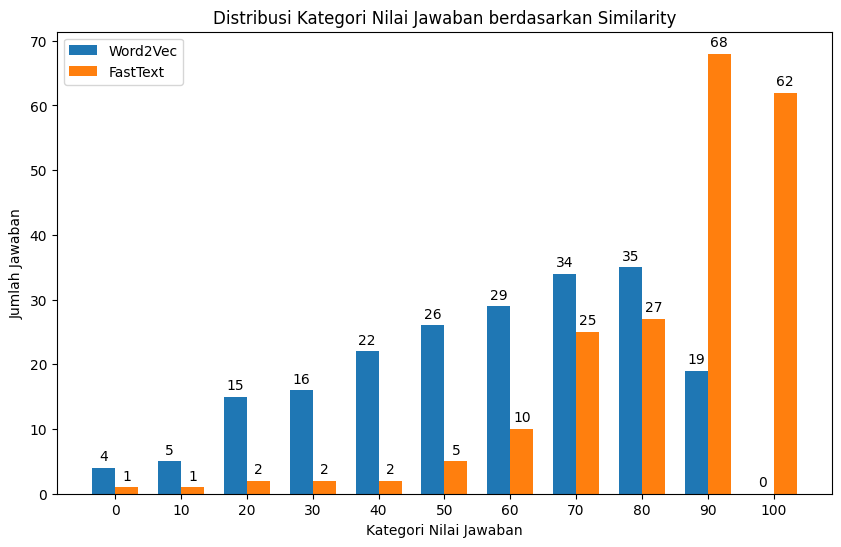

In [ ]:
counts_w2v = df3['kategori_w2v'].value_counts().sort_index()
counts_ft = df3['kategori_ft'].value_counts().sort_index()

all_categories = sorted(set(counts_w2v.index).union(set(counts_ft.index)))

counts_w2v_full = [counts_w2v.get(cat, 0) for cat in all_categories]
counts_ft_full = [counts_ft.get(cat, 0) for cat in all_categories]

x = np.arange(len(all_categories))  # posisi kategori di x-axis
width = 0.35  # lebar bar

fig, ax = plt.subplots(figsize=(10,6))
bar1 = ax.bar(x - width/2, counts_w2v_full, width, label='Word2Vec')
bar2 = ax.bar(x + width/2, counts_ft_full, width, label='FastText')

ax.set_xlabel('Kategori Nilai Jawaban')
ax.set_ylabel('Jumlah Jawaban')
ax.set_title('Distribusi Kategori Nilai Jawaban berdasarkan Similarity')
ax.set_xticks(x)
ax.set_xticklabels(all_categories)
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.show()

## b. Persentase Kategori Jawaban Word2Vec & FastText

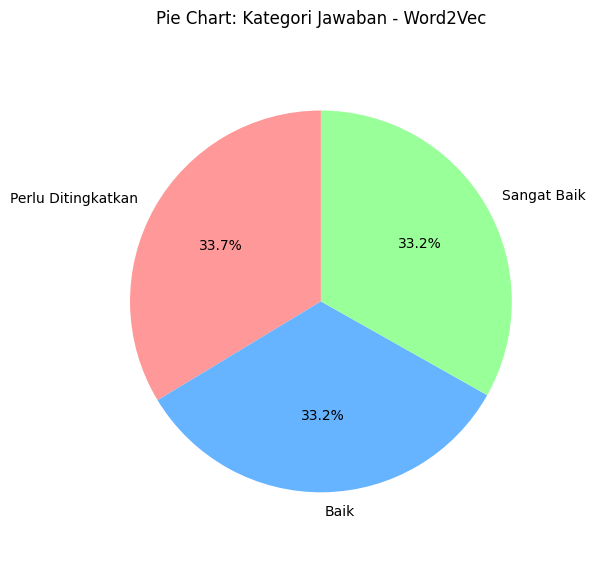

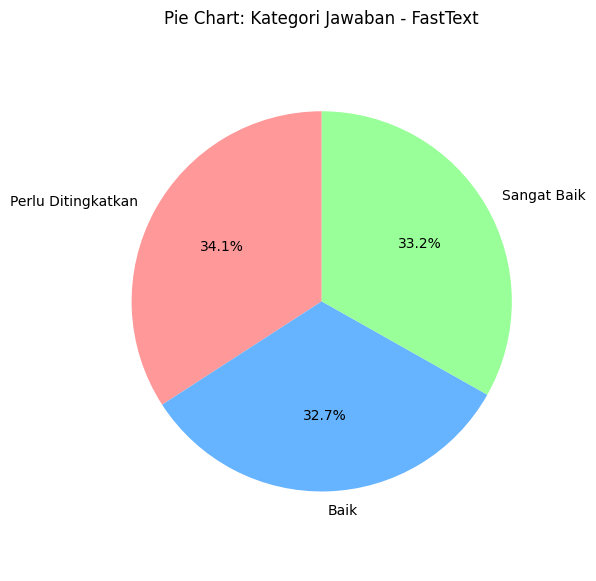

In [ ]:
w2v_counts = df3['kategori_quantile_w2v'].value_counts().sort_index()
ft_counts = df3['kategori_quantile_ft'].value_counts().sort_index()

colors = ['#ff9999', '#66b3ff', '#99ff99']

def plot_pie_chart(counts, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.axis('equal')
    ax.set_title(f'Pie Chart: {title}')
    plt.tight_layout()
    plt.show()

plot_pie_chart(w2v_counts, "Kategori Jawaban - Word2Vec")
plot_pie_chart(ft_counts, "Kategori Jawaban - FastText")

## c. Perbandingan Rata-rata Nilai per Mahasiswa (Top 3 dan Bottom 3)

In [ ]:
mean_scores_by_student = df3.groupby('ID_Mahasiswa')[['kategori_w2v', 'kategori_ft']].mean()

# Ambil 3 teratas dan 3 terbawah
top3_students = mean_scores_by_student.sort_values(by='kategori_w2v', ascending=False).head(3)
bottom3_students = mean_scores_by_student.sort_values(by='kategori_w2v').head(3)

compare_students_df = pd.concat([top3_students, bottom3_students])
compare_students_df.reset_index(inplace=True)
print(compare_students_df)


  ID_Mahasiswa  kategori_w2v  kategori_ft
0           M9          80.0         96.0
1          M11          78.0         98.0
2          M17          76.0         98.0
3          M29          38.0         60.0
4          M13          38.0         66.0
5          M20          38.0         80.0


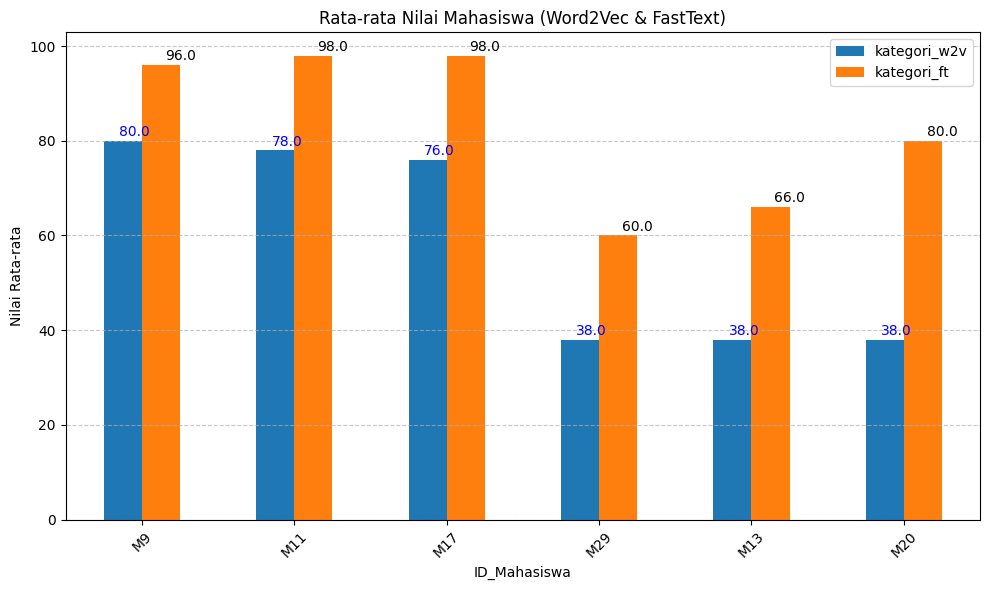

In [ ]:
# Top 3 & bottom 3 student chart
ax = compare_students_df.plot(kind='bar', x='ID_Mahasiswa', figsize=(10, 6),
                              title='Rata-rata Nilai Mahasiswa (Word2Vec & FastText)',
                              ylabel='Nilai Rata-rata')

for i, row in compare_students_df.iterrows():
    ax.text(i - 0.15, row['kategori_w2v'] + 1, f"{row['kategori_w2v']:.1f}", color='blue', fontsize=10)
    ax.text(i + 0.15, row['kategori_ft'] + 1, f"{row['kategori_ft']:.1f}", color='black', fontsize=10)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## d. Perbandingan Rata-rata Nilai per Pertanyaan

In [ ]:
mean_scores_by_question = df3.groupby('Pertanyaan')[['kategori_w2v', 'kategori_ft']].mean()
mean_scores_by_question = mean_scores_by_question.sort_values(by='kategori_w2v', ascending=False)

mean_scores_by_question.reset_index(inplace=True)
print(mean_scores_by_question)


                                          Pertanyaan  kategori_w2v  \
0  1. lebih adil mana: tugas yang dikerjakan sepe...     78.536585   
1  5. ai bisa bikin kamu lulus cepat, tapi kamu n...     66.341463   
2  4. apa satu risiko utama jika mahasiswa terlal...     51.951220   
3  3. dalam satu kalimat, kapan waktu paling berm...     46.829268   
4  2. bayangin kamu lagi ngerjain tugas dan ngobr...     40.243902   

   kategori_ft  
0    96.341463  
1    89.512195  
2    81.219512  
3    77.804878  
4    76.341463  


<ipython-input-52-eff3fa90f624>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


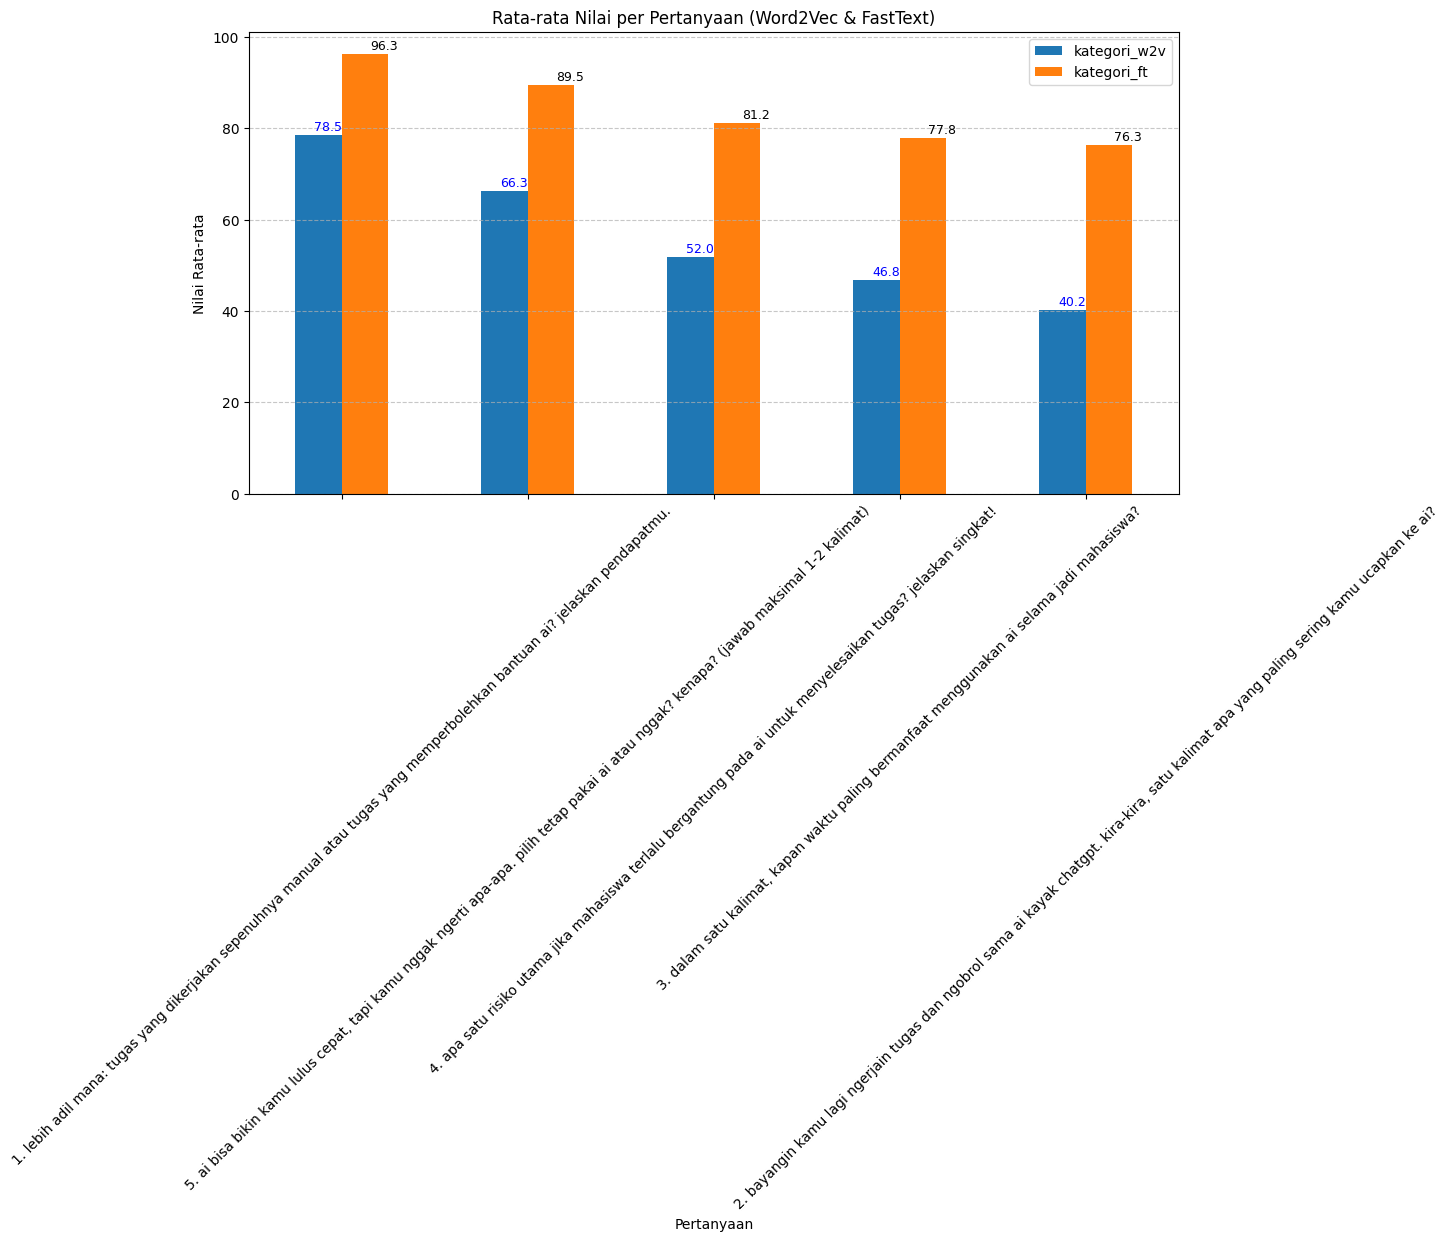

In [ ]:
ax2 = mean_scores_by_question.plot(kind='bar', x='Pertanyaan', figsize=(12, 6),
                                   title='Rata-rata Nilai per Pertanyaan (Word2Vec & FastText)',
                                   ylabel='Nilai Rata-rata')

for i, row in mean_scores_by_question.iterrows():
    ax2.text(i - 0.15, row['kategori_w2v'] + 1, f"{row['kategori_w2v']:.1f}", color='blue', fontsize=9)
    ax2.text(i + 0.15, row['kategori_ft'] + 1, f"{row['kategori_ft']:.1f}", color='black', fontsize=9)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
t